In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage.filters as filters
import pm

def plot(*args):
    count = len(args)
    fig, ax = plt.subplots(1,count)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    if count==1:
        ax.imshow(args[0], cmap="gray")
    else:
        for i in range(len(ax)):
            ax[i].imshow(args[i], cmap="gray")
    plt.show()

C:\Users\ogsimp\AppData\Local\Temp\ipykernel_17936\1647651340.py:20: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


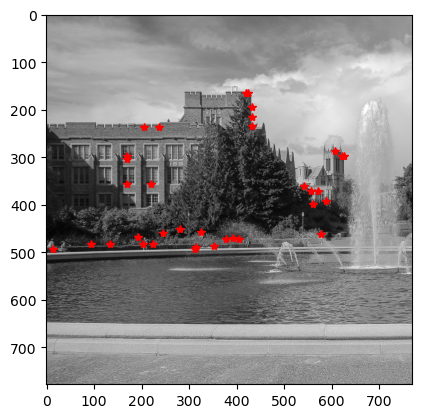

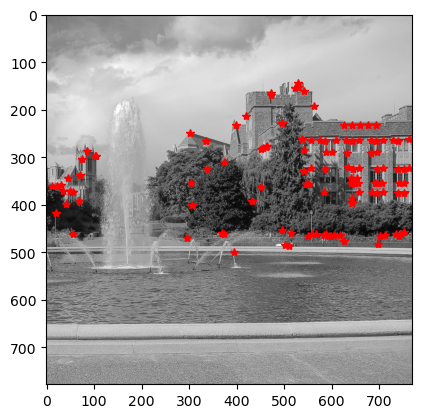

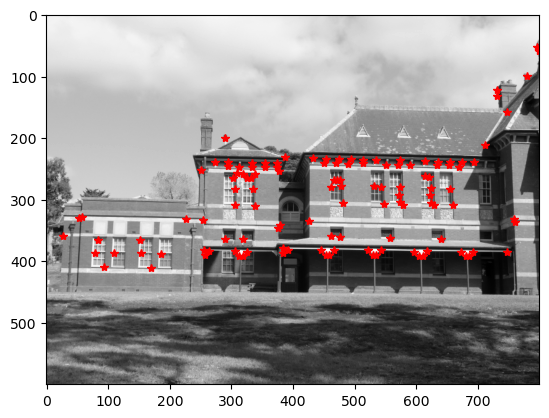

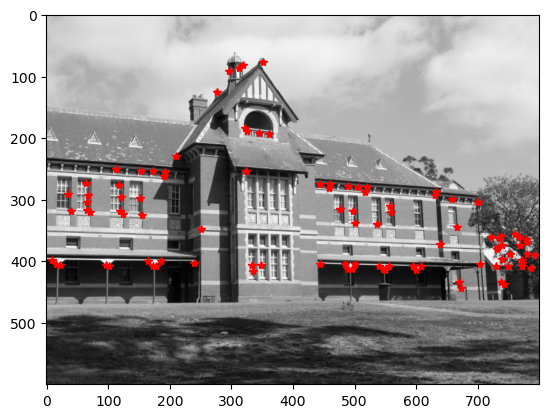

In [2]:
def harris(image, n=3, k=0.05):
    sobel_x = cv2.Sobel(image, cv2.CV_32F, 1, 0, n)
    sobel_y = cv2.Sobel(image, cv2.CV_32F, 0 , 1, n)

    ixx = sobel_x * sobel_x
    ixy = sobel_x * sobel_y
    iyy = sobel_y * sobel_y

    ixx_gaus = cv2.GaussianBlur(ixx, (n,n), 1)
    ixy_gaus = cv2.GaussianBlur(ixy, (n,n), 1)
    iyy_gaus = cv2.GaussianBlur(iyy, (n,n), 1)

    trace = ixx_gaus + ixy_gaus
    det = ixx_gaus*iyy_gaus - ixy_gaus**2
    H = det - k*trace**2

    return (H - np.min(H)) / (np.max(H) - np.min(H))

def find_max(image, size, threshold): #size - maximum filter mask size
    data_max = filters.maximum_filter(image, size)
    maxima = (image == data_max)
    diff = image > threshold
    maxima[diff == 0] = 0
    return np.nonzero(maxima)

def plot_maxes(image, maxes):
    plt.imshow(image, cmap="gray")
    plt.plot(maxes[1], maxes[0], "*", color="red")
    plt.show()


image_1 = cv2.imread("fontanna1.jpg", cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread("fontanna2.jpg", cv2.IMREAD_GRAYSCALE)
image_3 = cv2.imread("budynek1.jpg", cv2.IMREAD_GRAYSCALE)
image_4 = cv2.imread("budynek2.jpg", cv2.IMREAD_GRAYSCALE)

for image in [image_1, image_2, image_3, image_4]:
    h = harris(image)
    maxes = find_max(h, 7, 0.5)
    plot_maxes(image, maxes)


C:\Users\ogsimp\AppData\Local\Temp\ipykernel_17936\1647651340.py:20: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


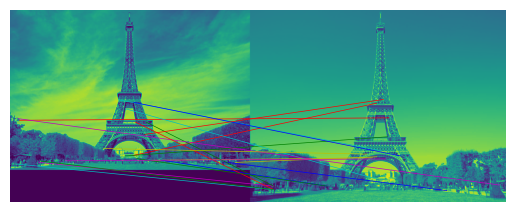

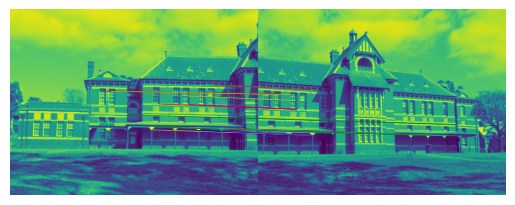

In [3]:
def descrption(image, points, size=3):
    Y, X = image.shape
    points = list(filter(lambda pt: pt[0] >= size and pt[0] < Y - size and pt[1]>= size and pt[1] < X - size, zip(points[0], points[1])))
    descriptions = []

    for point in points:
        point_description = image[point[0] - size: point[0] + size + 1, point[1] - size: point[1] + size + 1]
        descriptions.append(point_description.flatten())

    return list(zip(points, descriptions))

def description_updated(image, points, size=3):
    Y, X = image.shape
    points = list(filter(lambda pt: pt[0] >= size and pt[0] < Y - size and pt[1]>= size and pt[1] < X - size, zip(points[0], points[1])))
    descriptions = []

    for point in points:
        point_description = image[point[0] - size: point[0] + size + 1, point[1] - size: point[1] + size + 1]
        point_description = point_description.flatten()

        mean = np.mean(point_description)
        std = np.std(point_description)
        descriptions.append((point_description - mean) / std)

    return list(zip(points, descriptions))


def compare_descriptions(point_descs_1, point_descs_2, n=20):
    res = []

    for point_1, desc_1 in point_descs_1:
        min_dist = float("inf")
        best_one = None
        for point_2, desc_2 in point_descs_2:
            dist = sum(abs(desc_1 - desc_2))

            if dist < min_dist:
                min_dist = dist
                best_one = [point_1, point_2, dist]

        res.append(best_one)

    res.sort(key=lambda x: x[2])
    return res[:n]


def do_all(image_name_1, image_name_2):
    image_1 = cv2.imread(image_name_1, cv2.IMREAD_GRAYSCALE)
    image_2 = cv2.imread(image_name_2, cv2.IMREAD_GRAYSCALE)
    
    h_1 = harris(image_1)
    h_2 = harris(image_2)
    
    maxes_1 = find_max(h_1, 7, 0.5)
    maxes_2 = find_max(h_2, 7, 0.5)
    
    descrption_1 = descrption(image_1, maxes_1)
    descrption_2 = descrption(image_2, maxes_2)
    
    closest_points = compare_descriptions(descrption_1, descrption_2)
    
    pm.plot_matches(image_1, image_2, closest_points)

do_all("eiffel1.jpg", "eiffel2.jpg")
do_all("budynek1.jpg", "budynek2.jpg")

C:\Users\ogsimp\AppData\Local\Temp\ipykernel_17936\1647651340.py:20: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  data_max = filters.maximum_filter(image, size)


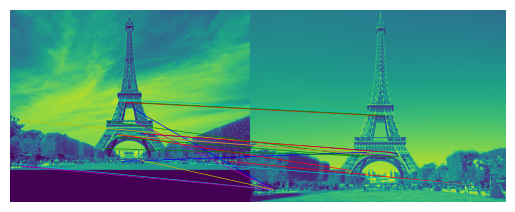

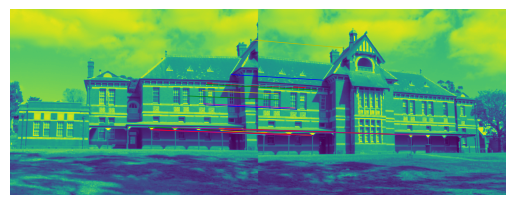

In [4]:
def do_all_2(image_name_1, image_name_2):
    image_1 = cv2.imread(image_name_1, cv2.IMREAD_GRAYSCALE)
    image_2 = cv2.imread(image_name_2, cv2.IMREAD_GRAYSCALE)
    
    h_1 = harris(image_1)
    h_2 = harris(image_2)
    
    maxes_1 = find_max(h_1, 7, 0.5)
    maxes_2 = find_max(h_2, 7, 0.5)
    
    descrption_1 = description_updated(image_1, maxes_1)
    descrption_2 = description_updated(image_2, maxes_2)
    
    closest_points = compare_descriptions(descrption_1, descrption_2)
    
    pm.plot_matches(image_1, image_2, closest_points)

do_all_2("eiffel1.jpg", "eiffel2.jpg")
do_all_2("budynek1.jpg", "budynek2.jpg")

In [8]:
def filter_h(h, n=10):
    Y,X = h.shape
    res = np.zeros(h.shape)
    points = []
    for y in range(n, Y - n):
        for x in range(n, X-n):
            context = h[y-n:y+n+1, x-n:x+n+1]
            max_val = np.max(context)
            if h[y,x] == max_val and max_val > 0.3 and y > 31 and y < Y -32 and x > 31 and x < X - 32:
                res[y,x] = max_val
                points.append([(y,x), max_val])
    print(np.max(res))
    return res, points

def has_consequent_count(circle, center, threshold, n=9):
    lower_count = 0
    higher_count = 0
    for val in circle:
        if val > center + threshold:
            higher_count += 1
            lower_count = 0
            if higher_count >= n:
                return True
        if val < center - threshold:
            lower_count += 1
            higher_count = 0
            if lower_count >= n:
                return True

    return False

def intensity_centroid(image, points):
    res_c = []
    res_angle = []
    for point in points:
        y, x = point[0]

        m00, m01, m10 = 0, 0, 0

        for i in range(y-3, y+3+1):
            for j in range(x-3, x+3+1):
                dy = y - i
                dx = x - j

                if dx*dx + dy*dy <= 3**2:
                    m00 += image[i, j]
                    m01 += dy * image[i, j]
                    m10 += dx * image[i, j]
        c = (m10/m00, m01/m00)
        angle = np.arctan2(m01,m10)
        res_c.append(c)
        res_angle.append(angle)

    return res_c, res_angle


def fast(image):
    Y,X = image.shape
    h = harris(image, n=7)
    s=31
    tmp_hamming = np.zeros(image.shape)
    for y in range(s, Y - s):
        for x in range(s, X - s):
            center = image[y,x]

            circle = [image[y+3,x-1], image[y+3,x], image[y+3,x+1],
                      image[y+2,x+2],
                      image[y+1,x+3], image[y,x+3], image[y-1,x+3],
                      image[y-2,x+2],
                      image[y-3,x+1], image[y-3,x], image[y-3,x-1],
                      image[y-2,x-2],
                      image[y-1, x-3], image[y,x-3], image[y+1,x-3],
                      image[y+2,x-2]]
            if has_consequent_count(circle, center, 40):
                tmp_hamming[y,x] = h[y,x]

    h_filtered, points = filter_h(tmp_hamming)
    
    plot(h_filtered)

    points.sort(key=lambda x: x[1], reverse=True)
    points = points[:25]
    # plt.imshow(image)
    # plt.plot([x[0][1] for x in points], [x[0][0] for x in points], "*", color="red")
    
    return points
    




In [9]:
def hamming(vals_1, vals_2):
    res = 0
    for i in range(len(vals_1)):
        res += 1 if vals_1[i] != vals_2[i] else 0

    return res

def brief(image, points, theta):
    res = []
    points_to_compare = []
    with open('orb_descriptor_positions.txt', 'r') as file:
        for line in file:
            points_to_compare.append([float(x) for x in line.split(" ")])


    for i in range(len(points)):
        point = points[i]
        point_res = []
        y,x = point[0]
        context = image[y-15:y+16, x-15:x+16]
        context = cv2.GaussianBlur(context, (5,5), 1)

        for compare in points_to_compare:

            start_x, start_y = tuple(compare[:2])
            end_x, end_y = tuple(compare[2:])
            start_x, start_y, end_x, end_y = int(start_x), int(start_y), int(end_x), int(end_y)

            start_x_r = int(np.cos(theta[i]) * start_x - np.sin(theta[i])*start_y) + 15
            start_y_r = int(np.sin(theta[i]) * start_y + np.cos(theta[i])*start_x) + 15

            end_x_r = int(np.cos(theta[i]) * end_x - np.sin(theta[i])*end_y) + 15
            end_y_r = int(np.sin(theta[i]) * end_y + np.cos(theta[i])*end_x) + 15

            start_x_r = min(start_x_r, 30)
            start_y_r = min(start_y_r, 30)
            end_x_r = min(end_x_r, 30)
            end_y_r = min(end_y_r, 30)

            # print(compare)
            # print(start_x_r, start_y_r, end_x_r, end_y_r, theta[i])
    
            if context[start_y_r, start_x_r] < context[end_y_r, end_x_r]:
                point_res.append(1)
            else:
                point_res.append(0)

        res.append([(y,x),point_res])

    return res




1.0


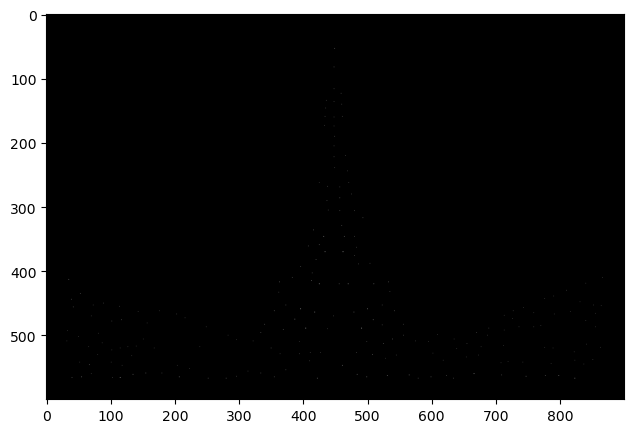

1.0


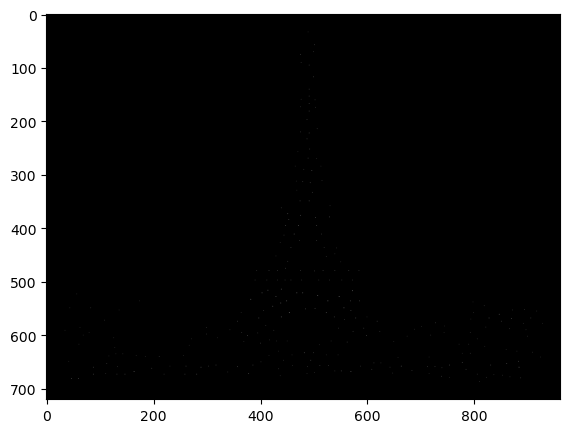

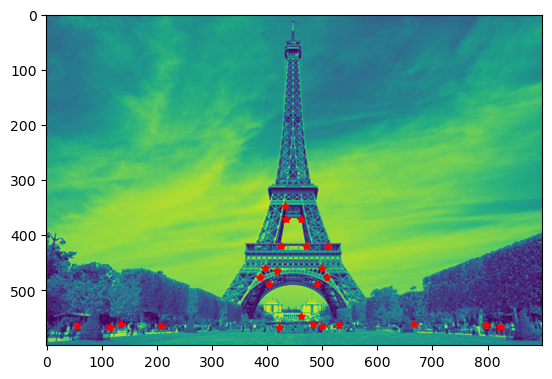

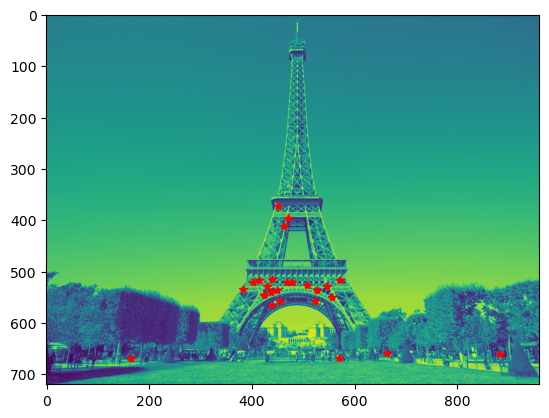

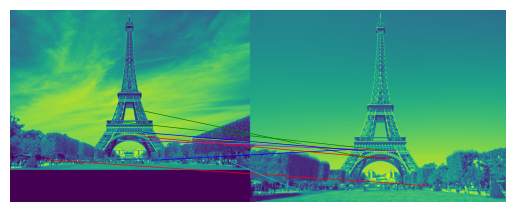

: 

In [10]:
def join_brief_points(points_1, points_2):
    res = []
    for i in range(len(points_1)):
        point_1, scores_1 = points_1[i]
        min_dist = float("inf")
        best_point = None
        for j in range(len(points_2)):
            point_2, scores_2 = points_2[i]
            dist = hamming(scores_1, scores_2) 
            if dist < min_dist:
                min_dist = dist
                best_point = point_2

        res.append([point_1, best_point, min_dist])

    return res


def do_all(image_name_1, image_name_2):
    image_1 = cv2.imread(image_name_1, cv2.IMREAD_GRAYSCALE)
    best_points_1 = fast(image_1)
    C_1, theta_1 = intensity_centroid(image_1, best_points_1)
    points_1 = brief(image_1, best_points_1, theta_1)


    image_2 = cv2.imread(image_name_2, cv2.IMREAD_GRAYSCALE)
    best_points_2 = fast(image_2)
    C_2, theta_2 = intensity_centroid(image_2, best_points_2)
    points_2 = brief(image_2, best_points_2, theta_2)

    plt.imshow(image_1)
    plt.plot([p[0][1] for p in points_1], [p[0][0] for p in points_1], "*", color="red")
    plt.show()

    plt.imshow(image_2)
    plt.plot([p[0][1] for p in points_2], [p[0][0] for p in points_2], "*", color="red")
    plt.show()

    res = join_brief_points(points_1, points_2)

    res.sort(key=lambda x: x[2],)
    res = res[:10]

    pm.plot_matches(image_1, image_2, res)

do_all("eiffel1.jpg", "eiffel2.jpg")


0.9531360864639282


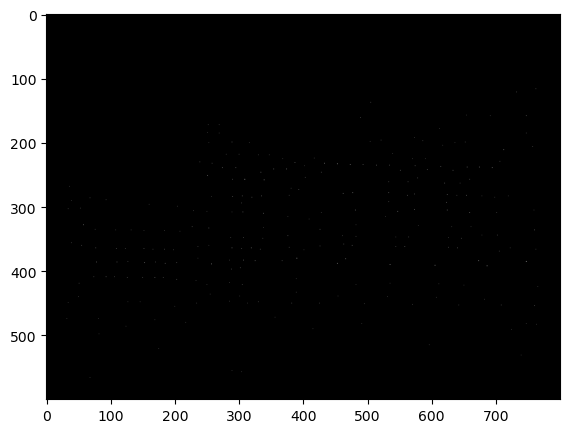

0.8740541934967041


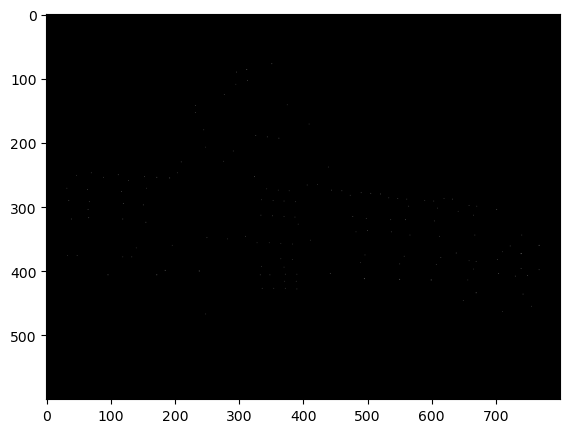

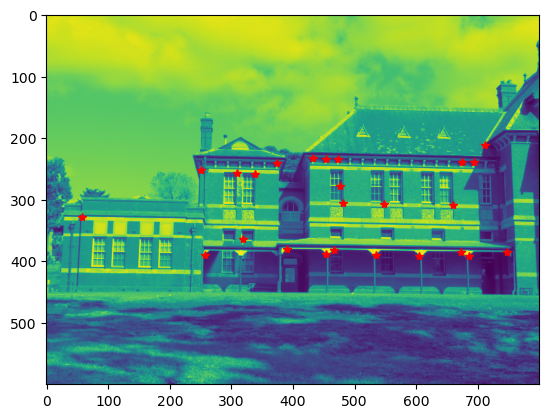

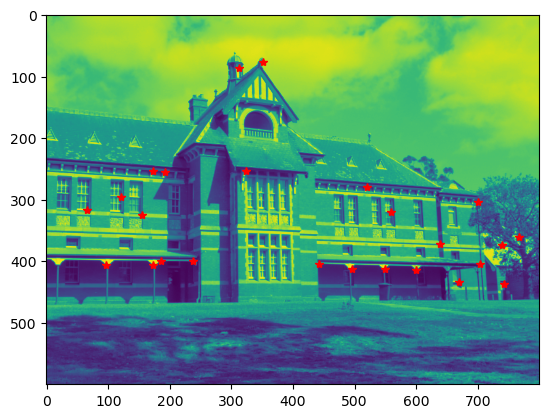

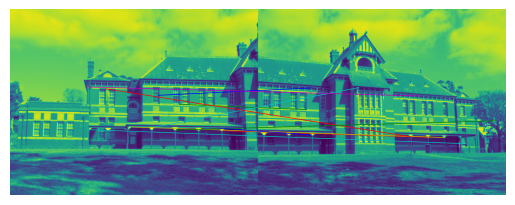

In [ ]:
do_all("budynek1.jpg", "budynek2.jpg")